In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Netflix Data Analysis

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# View first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Check missing values

In [6]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Clean missing data

In [7]:
# Fill missing directors with "Unknown"
df['director'] = df['director'].fillna("Unknown")

# Fill missing cast with "Not listed"
df['cast'] = df['cast'].fillna("Not listed")

# Fill missing country with "Unknown"
df['country'] = df['country'].fillna("Unknown")

# Fill missing date_added with "Unknown"
df['date_added'] = df['date_added'].fillna("Unknown")

# Fill missing ratings with mode (most common value)
most_common_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(most_common_rating)

# Drop rows where 'duration' is missing (only 3 rows)
df = df.dropna(subset=['duration'])

# Confirm missing values are handled
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Objective
Explore the Netflix dataset to understand popular genres, content type distribution, release trends, and country production.

## how much of the content is Movies vs TV Shows?

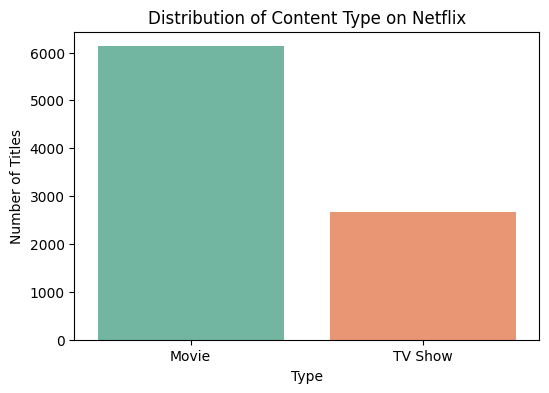

In [10]:
# Count of content type
type_counts = df['type'].value_counts()

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette="Set2", legend=False)
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.show()


## what are the most Common Genres


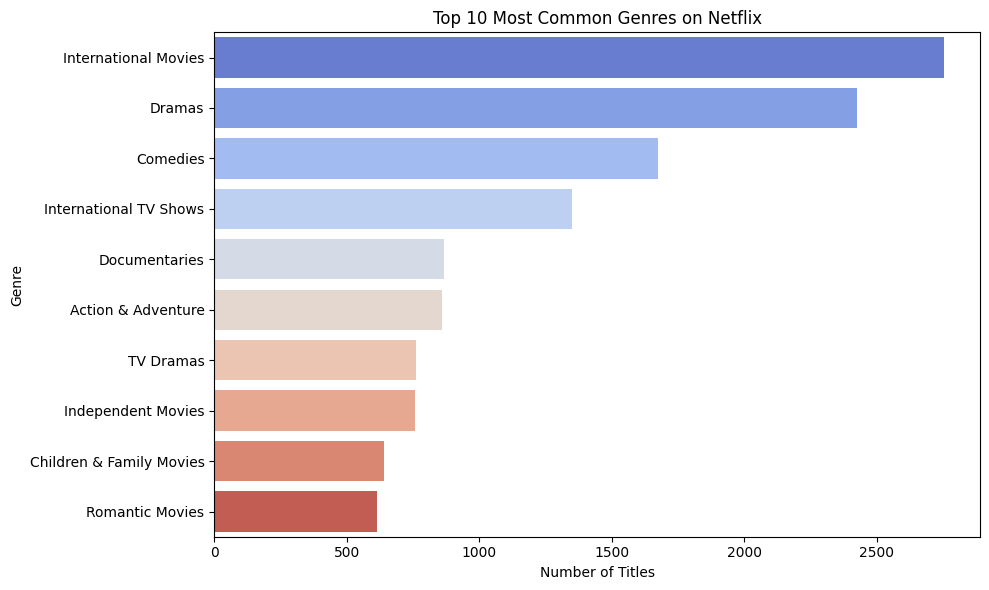

In [12]:
# Split genres into a list
genres_series = df['listed_in'].dropna().apply(lambda x: x.split(', '))

# Flatten the list and count occurrences
from collections import Counter

# Split genres into lists
genres_series = df['listed_in'].dropna().apply(lambda x: x.split(', '))

# Flatten the list and count occurrences
genre_counts = Counter([genre for sublist in genres_series for genre in sublist])

# Convert to DataFrame
top_genres = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', hue='Genre', palette='coolwarm', legend=False)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


## how many shows/movies are being released per year?


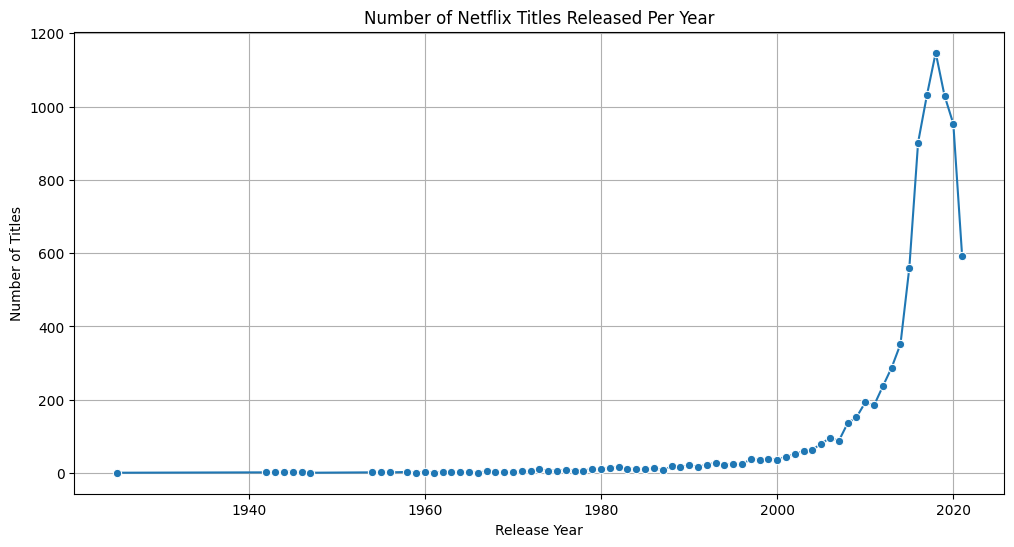

In [13]:
# Count of releases per year
release_trends = df['release_year'].value_counts().sort_index()

# Line plot
plt.figure(figsize=(12,6))
sns.lineplot(x=release_trends.index, y=release_trends.values, marker='o')
plt.title("Number of Netflix Titles Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

## which countries produce the most content on Netflix?


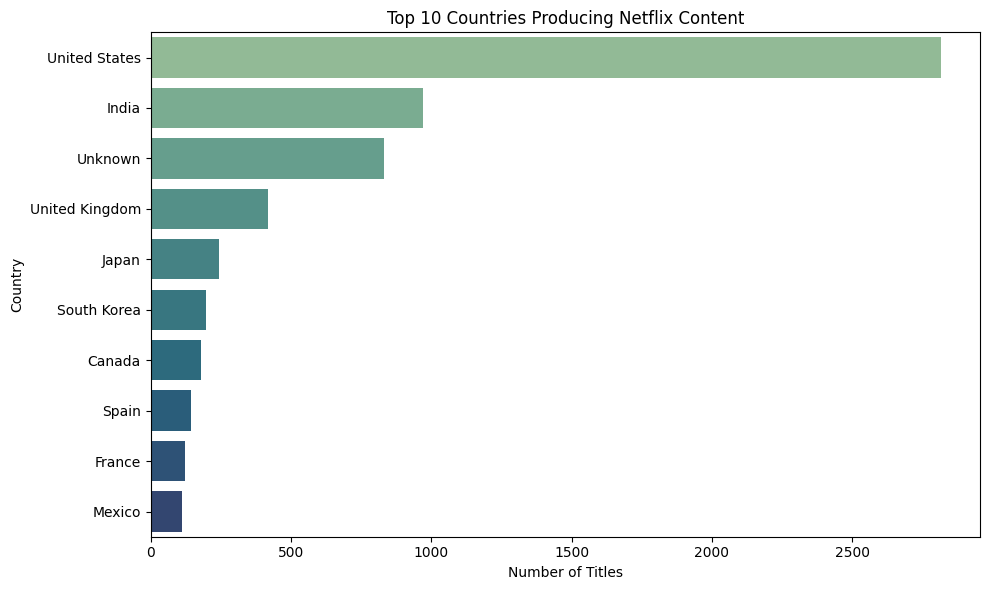

In [15]:
# Count countries (some entries have multiple countries separated by commas)
country_series = df['country'].dropna().apply(lambda x: x.split(', ')[0])  # Use first listed country

top_countries = df['country'].dropna().value_counts().head(10)

# Create a DataFrame for plotting
top_countries_df = pd.DataFrame({'Country': top_countries.index, 'Count': top_countries.values})

# Plot with hue to avoid warning
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries_df, x='Count', y='Country', hue='Country', palette='crest', legend=False)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
